In [1]:
using DifferentialEquations
using PyCall
# pygui(:qt)
using PyPlot
# pygui(true)
using BSON: @save, @load
include("leap_frog_definitions.jl")
include("PSS_Definitions_Dimer_X.jl")
@load "0_120000000000000.bson" SAVE_DATA

The Poincare' Surface of section for this orbit is 

In [2]:
H=.12
max_time=100
h=1/(2*H)
max_time=100
a=(2+h-2*sqrt(h+1))/h


q20=1
p20=0
q2=q20
p2=p20
q1=0
p1=P1_find_dimer(q20,p20,H)
if isempty(p1)
    p1=P1_find_dimer_second(q20,p20,H)
end

Q1=(q1+q2)/sqrt(2)
Q2=(q1-q2)/sqrt(2)
P1=(p1[1]+p2)/sqrt(2)
P2=(p1[1]-p2)/sqrt(2);

u0=[Q1;P2;Q2;P1;0;0] # X P Q Y
Q0=[Q1,Q2]; P0=[P1,P2];
tspan = (0.0,max_time);
h_test=Aref_Hamiltonian(Q0,P0,0);
println(h_test)

0.11999999999999998


In [8]:
prob = ODEProblem(Eq_of_M_LAB_FRAME,u0,tspan)
t,A=solve(prob, RK4(),reltol=1e-6,abstol=1e-8,maxiters=1e15);
N=length(t.t)
Q1=A[1,:]
Q2=A[3,:]
P1=A[4,:]
P2=A[2,:]

q1=(Q1+Q2)/sqrt(2)
q2=(Q1-Q2)/sqrt(2)
p1=(P1+P2)/sqrt(2)
p2=(P1-P2)/sqrt(2);

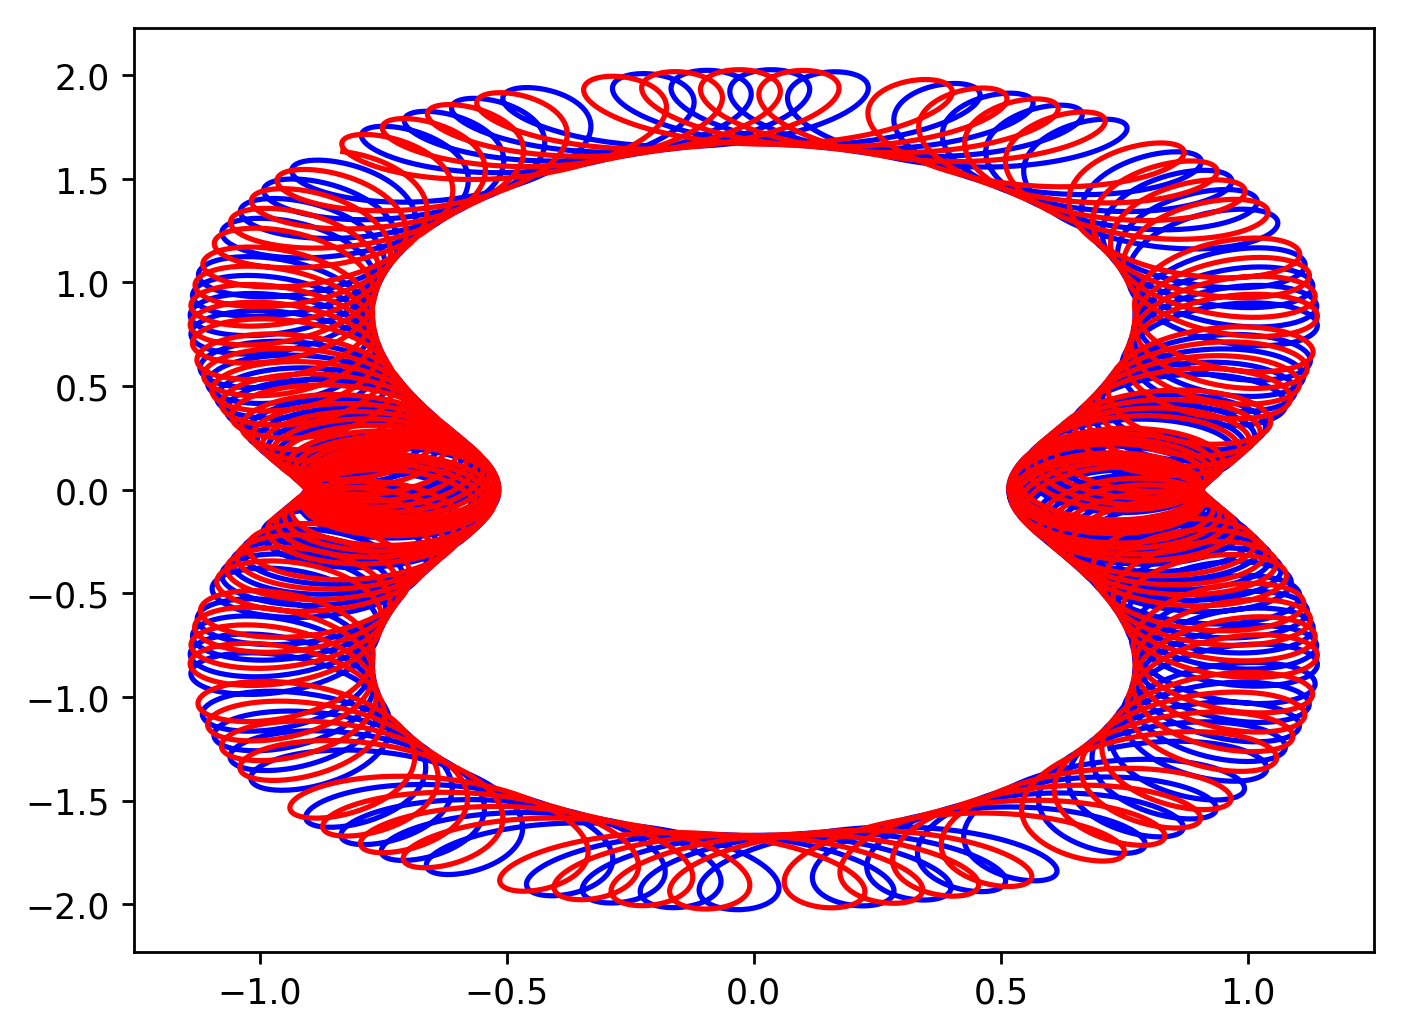

In [17]:
figure(dpi=250)
plot(Q1,P1,"b")
plot(Q2,P2,"r");

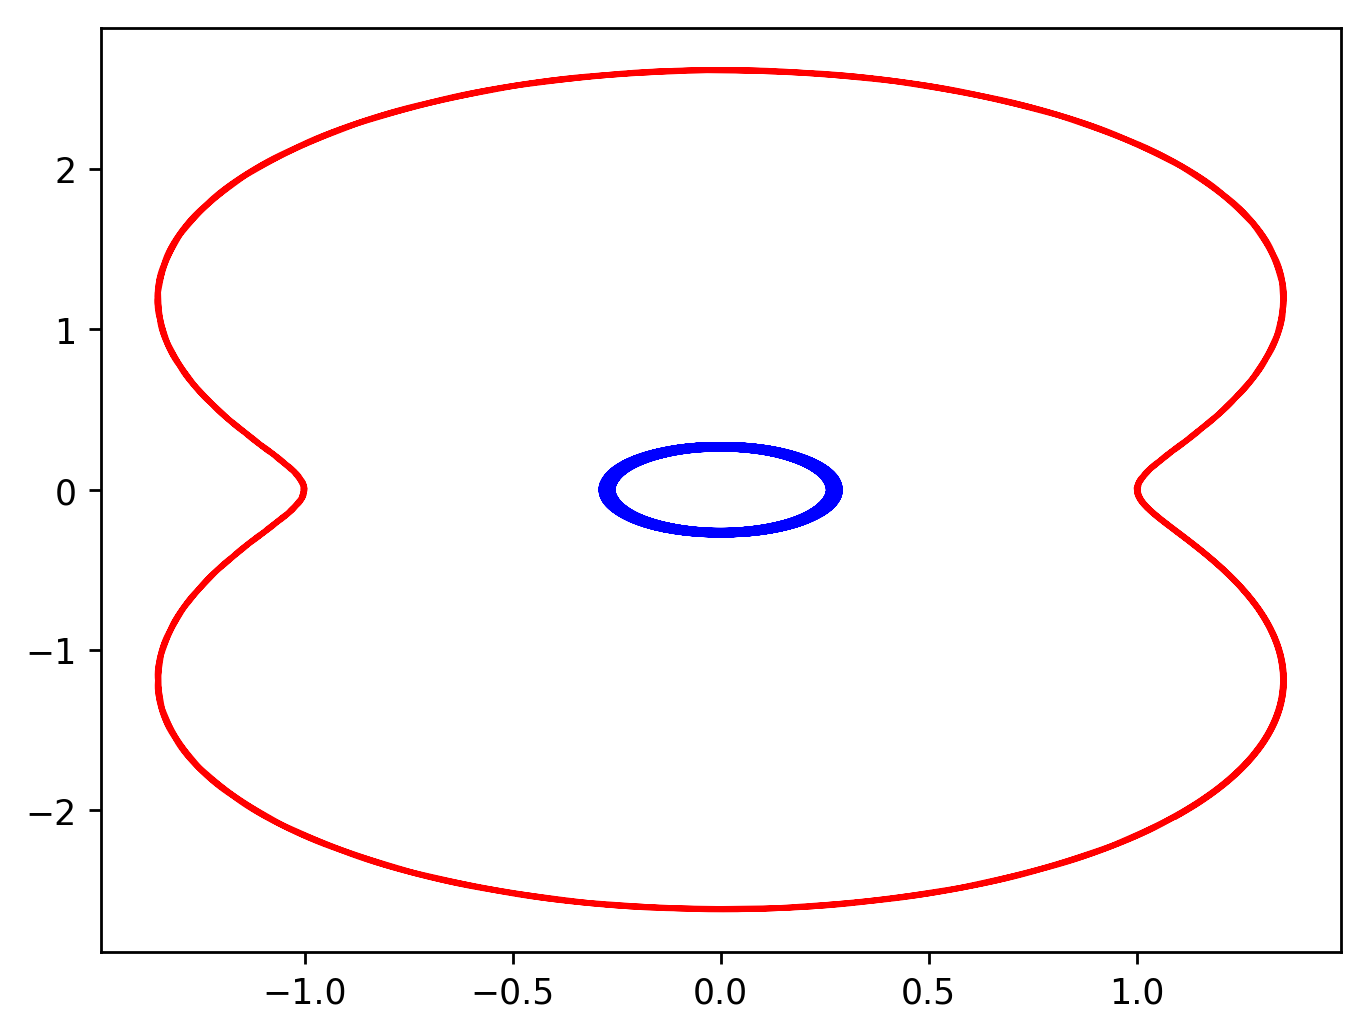

In [16]:
figure(dpi=250)
plot(q1,p1,"b")
plot(q2,p2,"r");

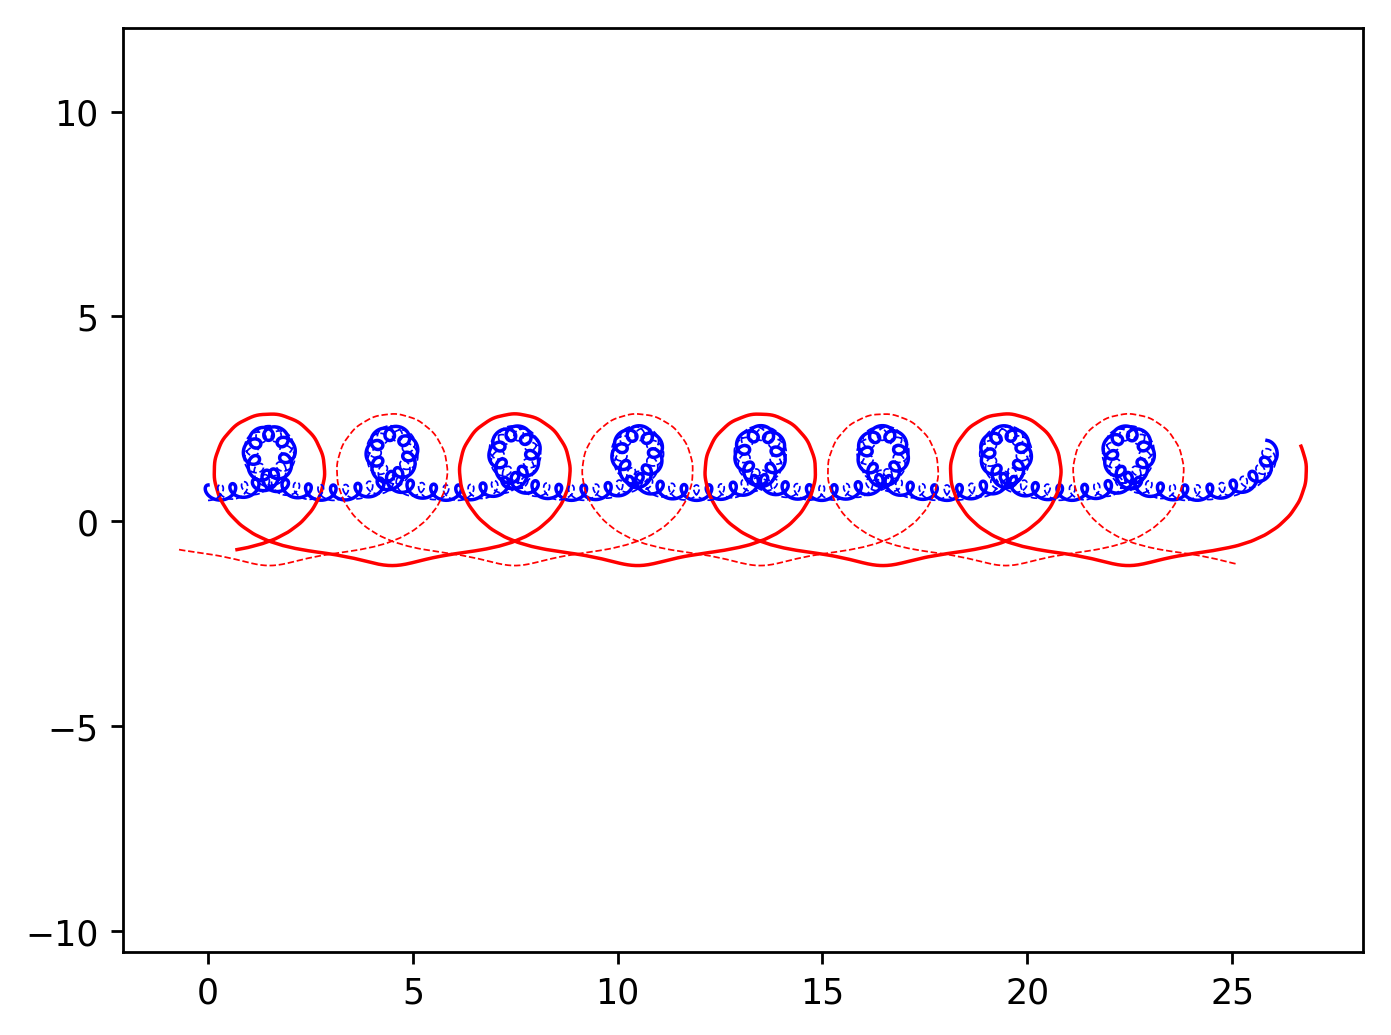

In [32]:
Centeroid=A[5,:]+im *A[6,:];
Z=A[1,:]+im *A[2,:];
W=A[3,:]+im *A[4,:];
lin_impulse=im*(1+a )*ones(N);
z_1pos=.5*(Centeroid+Z+lin_impulse+W);
z_1neg=.5*(Centeroid+Z-lin_impulse-W);
z_2pos=.5*(Centeroid-Z+lin_impulse-W);
z_2neg=.5*(Centeroid-Z-lin_impulse+W);

z_1posX=real(z_1pos)
z_1posY=imag(z_1pos)

z_2posX=real(z_2pos)
z_2posY=imag(z_2pos)

z_1negX=real(z_1neg)
z_1negY=imag(z_1neg)

z_2negX=real(z_2neg)
z_2negY=imag(z_2neg)

figure(dpi=250)
plot(z_1posX,z_1posY,c="b",linewidth=1)
plot(z_1negX,z_1negY,c="r",linewidth=1)
plot(z_2posX,z_2posY,c="b",linewidth=.5,linestyle="--")
plot(z_2negX,z_2negY,c="r",linewidth=.5,linestyle="--")
ylim(-3.2,3.2)
axis("equal")

show()

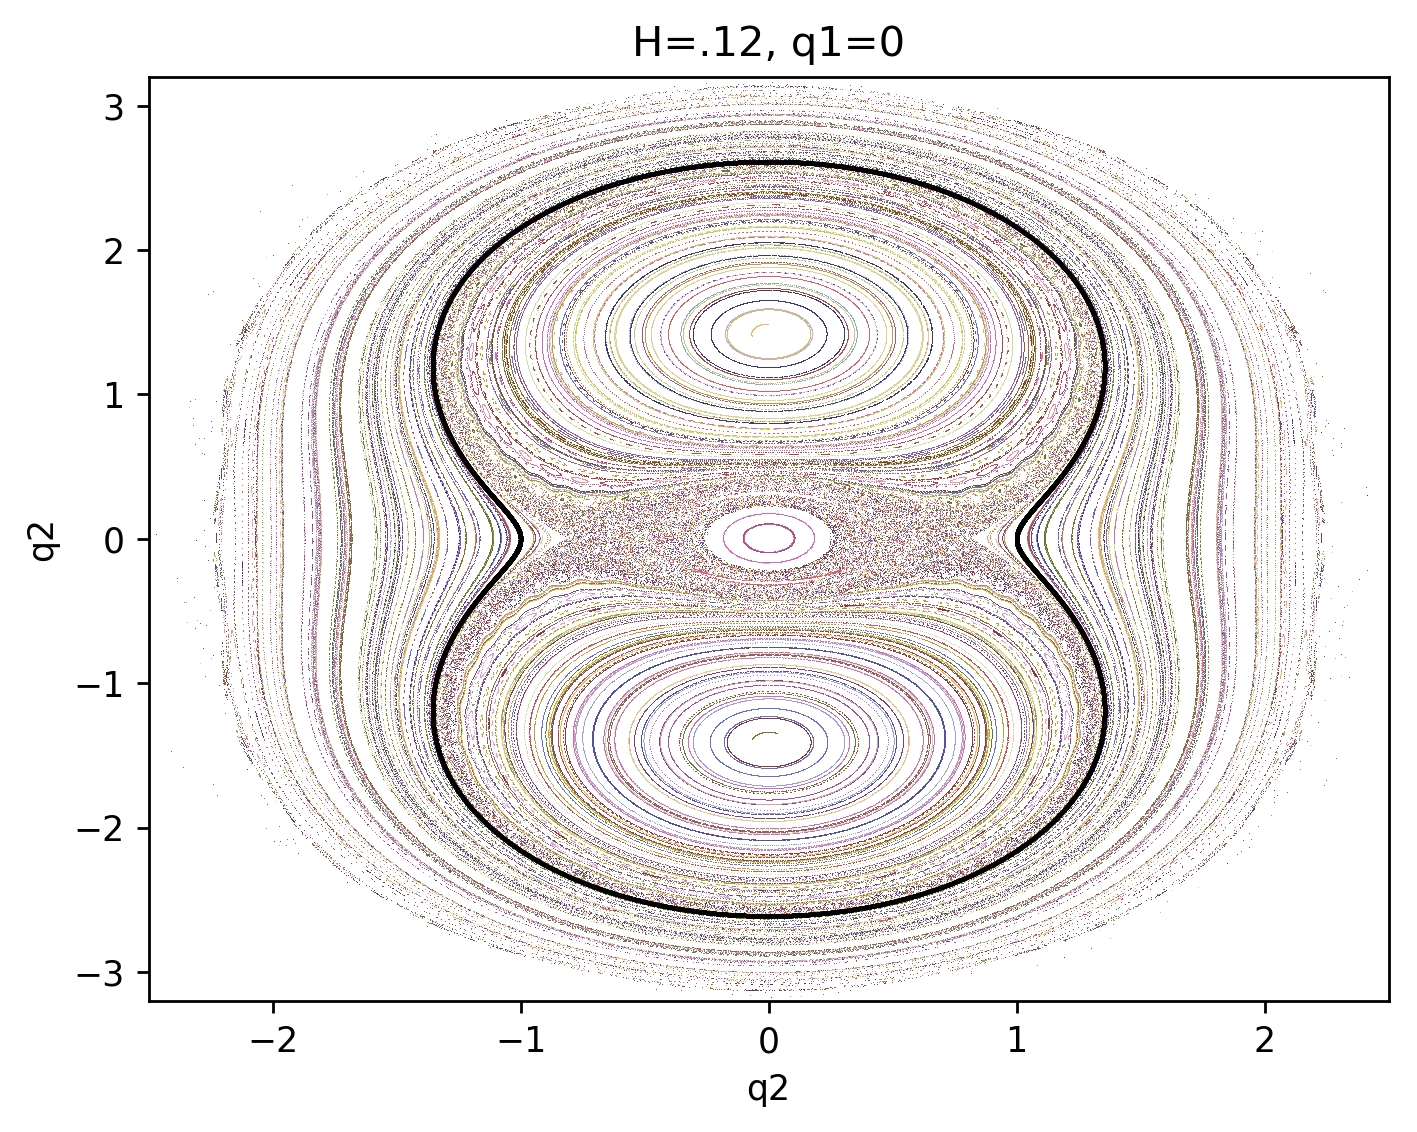

In [37]:
Brandons_Colors=["#393b79" ,"#5254a3","#6b6ecf","#9c9ede" ,"#637939","#8ca252" ,"#b5cf6b" ,"#cedb9c" ,"#8c6d31","#bd9e39" ,"#e7ba52","#e7cb94","#843c39","#ad494a" ,"#d6616b","#e7969c" ,"#7b4173" ,"#a55194","#ce6dbd" ,"#de9ed6"];
color_counter=0
figure(dpi=250)
for c in keys(SAVE_DATA)
    global color_counter
    color_counter+=1
    Q_PSS,P_PSS=SAVE_DATA[c]
    current_color=Brandons_Colors[mod(color_counter,length(Brandons_Colors))+1]
    plot(Q_PSS,P_PSS,",",c=current_color);
end 
# Q_PSS_1,P_PSS_1=PSS_function(q20, p20, H, 1e5);
plot(Q_PSS_1,P_PSS_1, ".",markersize=.1,c="k");

xlabel("q2")
ylabel("q2")
title("H=.12, q1=0")
xlim(-2.5,2.5) 
ylim(-3.2,3.2) 
show()

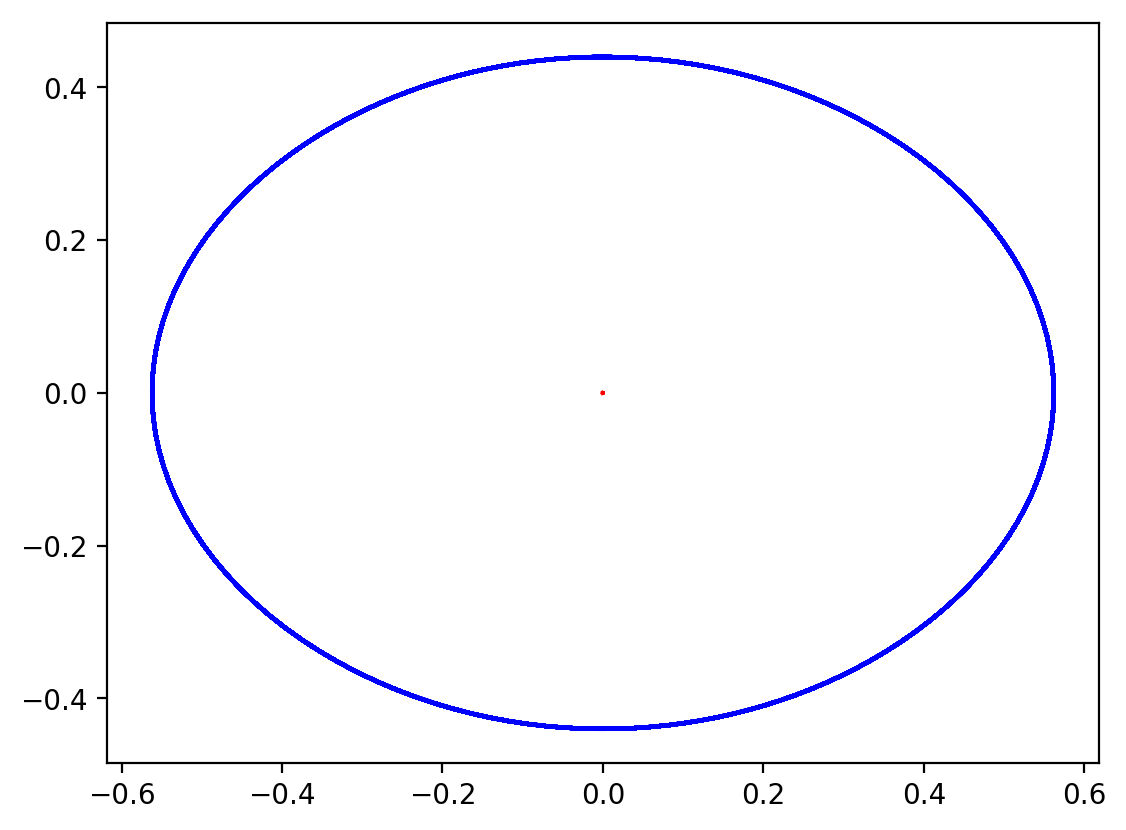

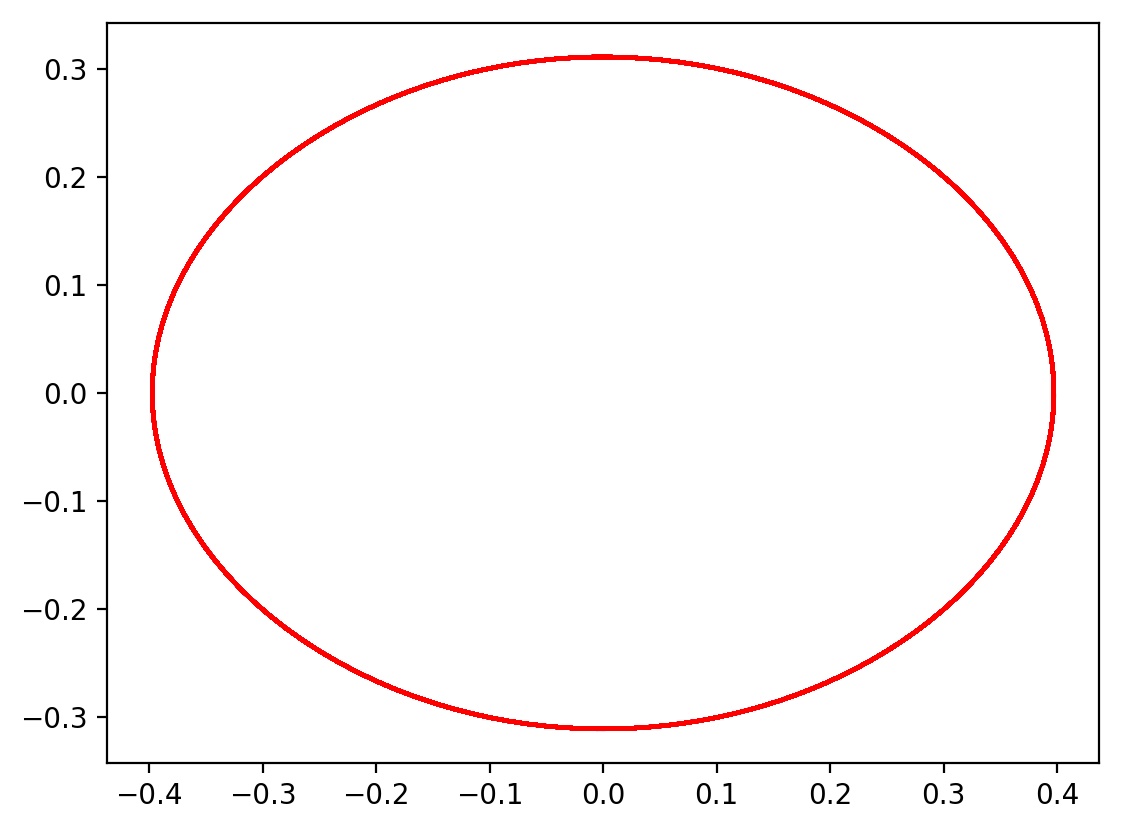

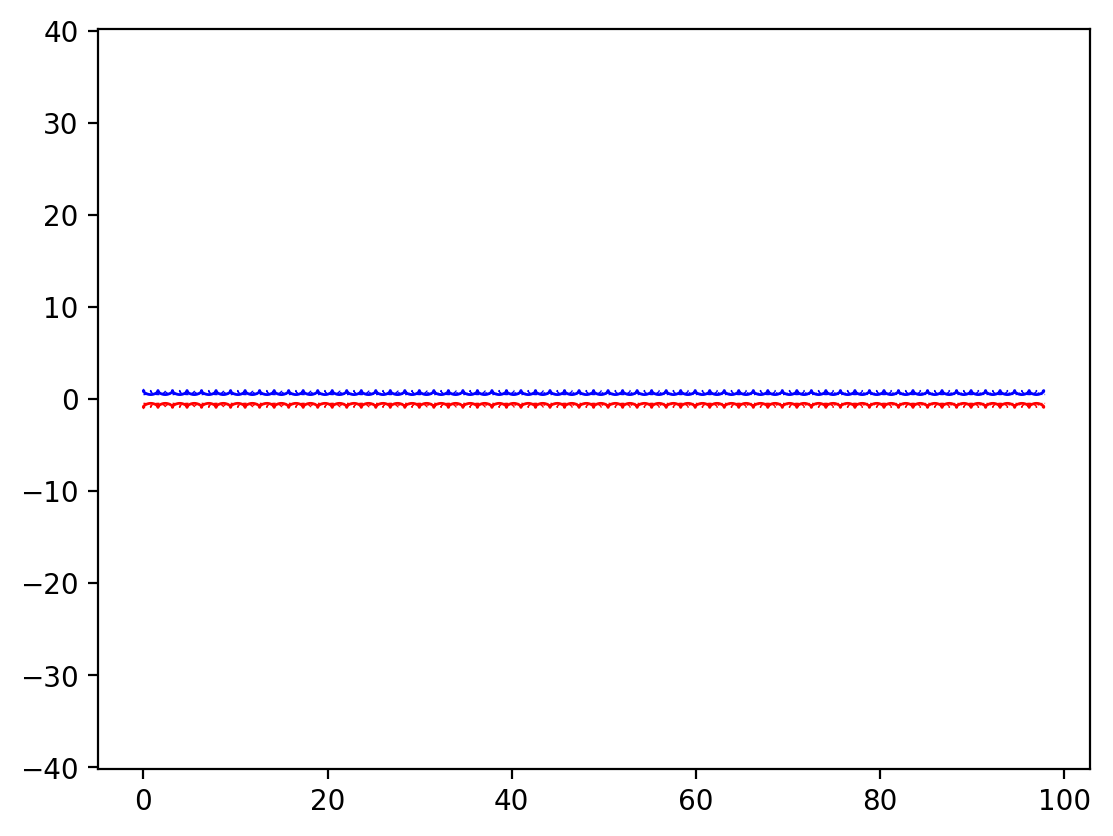

(-4.917995708393209, 102.81481093281958, -1.0058877451178552, 1.0058877451178552)

In [44]:
H=.12
max_time=10
h=1/(2*H)
a=(2+h-2*sqrt(h+1))/h
tspan = (0.0,max_time)
Yfind(h)=sqrt(h/(2h+1));
P=Yfind(H)

q20=0
p20=P
q2=q20
p2=p20
q1=0
p1=P1_find_dimer(q20,p20,H)
if isempty(p1)
    p1=P1_find_dimer_second(q20,p20,H)
end

Q1=(q1+q2)/sqrt(2)
Q2=(q1-q2)/sqrt(2)
P1=(p1[1]+p2)/sqrt(2)
P2=(p1[1]-p2)/sqrt(2);

u0=[Q1;P2;Q2;P1;0;0] # X P Q Y
Q0=[Q1,Q2]; P0=[P1,P2];
tspan = (0.0,max_time);
    prob = ODEProblem(Eq_of_M_LAB_FRAME,u0,tspan)
t,A=solve(prob, RK4(),reltol=1e-6,abstol=1e-8,maxiters=1e15);
N=length(t.t)
Q1=A[1,:]
Q2=A[3,:]
P1=A[4,:]
P2=A[2,:]

q1=(Q1+Q2)/sqrt(2)
q2=(Q1-Q2)/sqrt(2)
p1=(P1+P2)/sqrt(2)
p2=(P1-P2)/sqrt(2)
    
Centeroid=A[5,:]+im *A[6,:];
Z=A[1,:]+im *A[2,:];
W=A[3,:]+im *A[4,:];
lin_impulse=im*(1+a )*ones(N);
z_1pos=.5*(Centeroid+Z+lin_impulse+W);
z_1neg=.5*(Centeroid+Z-lin_impulse-W);
z_2pos=.5*(Centeroid-Z+lin_impulse-W);
z_2neg=.5*(Centeroid-Z-lin_impulse+W);

z_1posX=real(z_1pos)
z_1posY=imag(z_1pos)

z_2posX=real(z_2pos)
z_2posY=imag(z_2pos)

z_1negX=real(z_1neg)
z_1negY=imag(z_1neg)

z_2negX=real(z_2neg)
z_2negY=imag(z_2neg)
    
    
figure(dpi=200)
plot(Q1,P1,"b")
plot(Q2,P2,"r")

figure(dpi=200)
plot(q1,p1,"b")
plot(q2,p2,"r")

figure(dpi=200)
plot(z_1posX,z_1posY,c="b",linewidth=1)
plot(z_1negX,z_1negY,c="r",linewidth=1)
plot(z_2posX,z_2posY,c="b",linewidth=.5,linestyle="--")
plot(z_2negX,z_2negY,c="r",linewidth=.5,linestyle="--")
ylim(-3.2,3.2)
axis("equal")


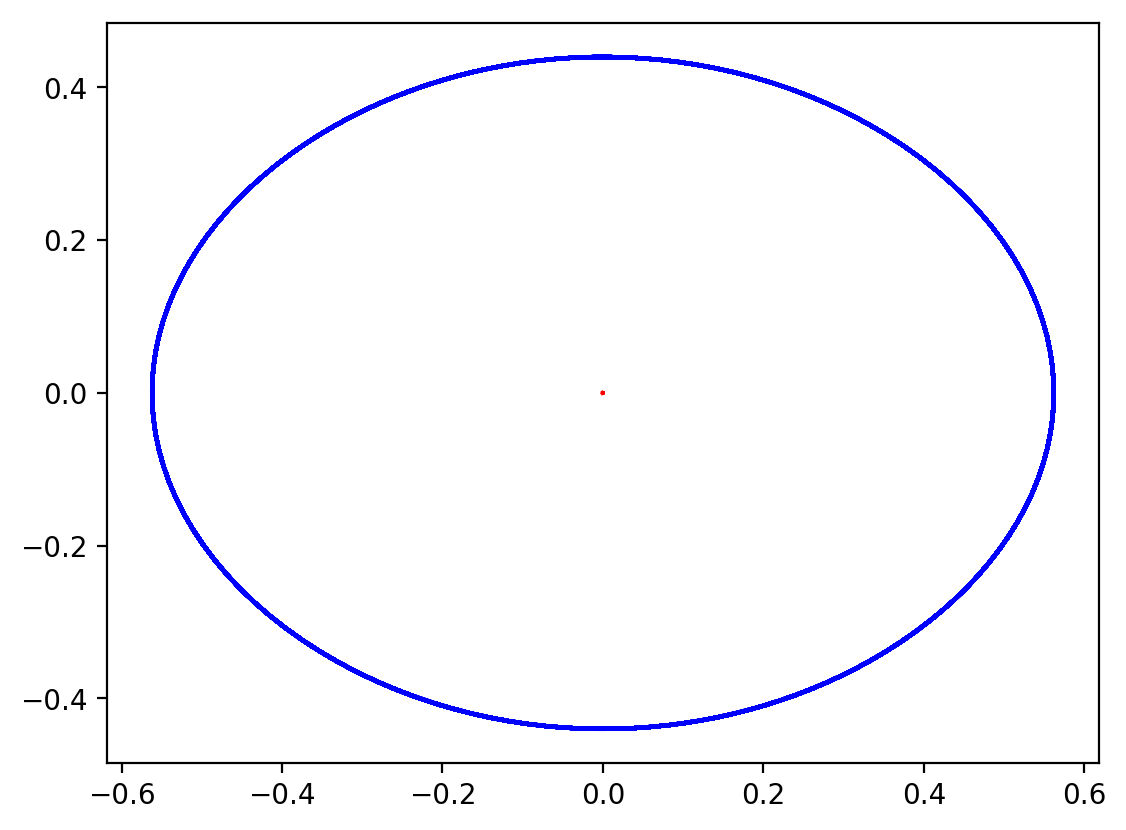

In [46]:
figure(dpi=200)
plot(Q1,P1,"b")
plot(Q2,P2,"r");

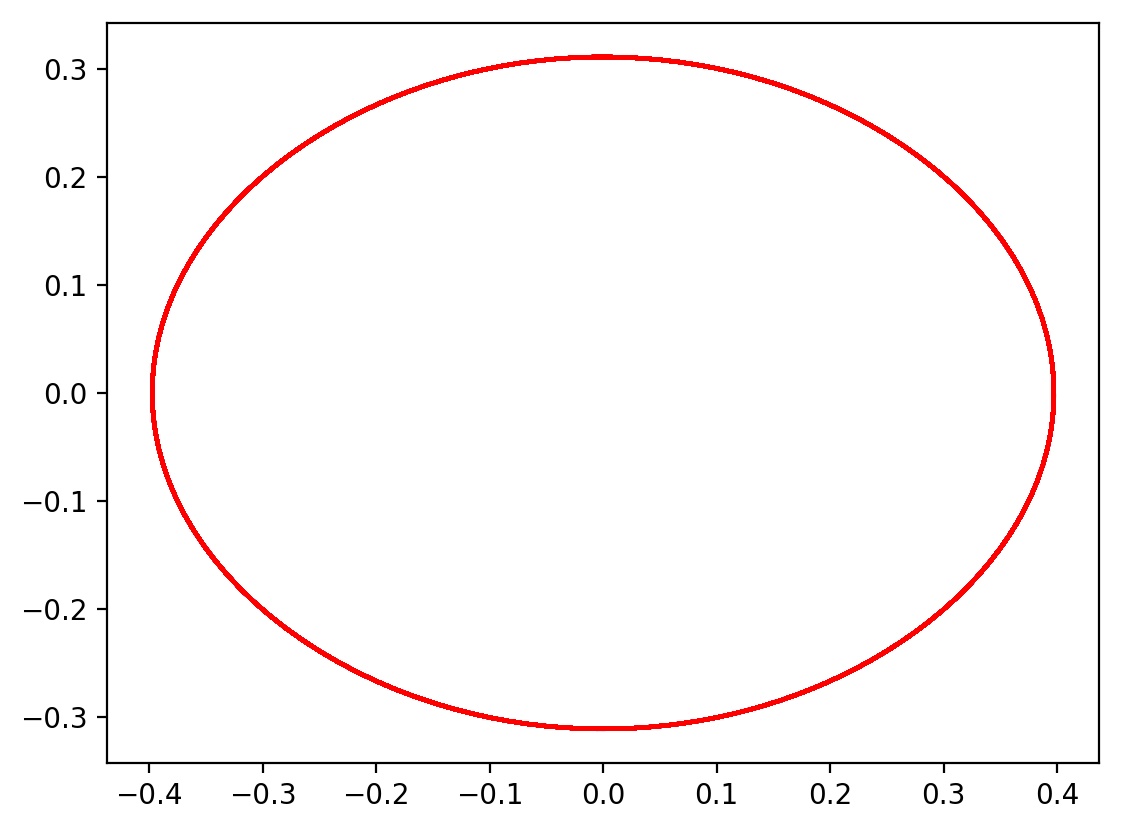

In [47]:
figure(dpi=200)
plot(q1,p1,"b")
plot(q2,p2,"r");